In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
data=pd.read_csv("C:/Users/kumar/Downloads/titanic_data.csv")

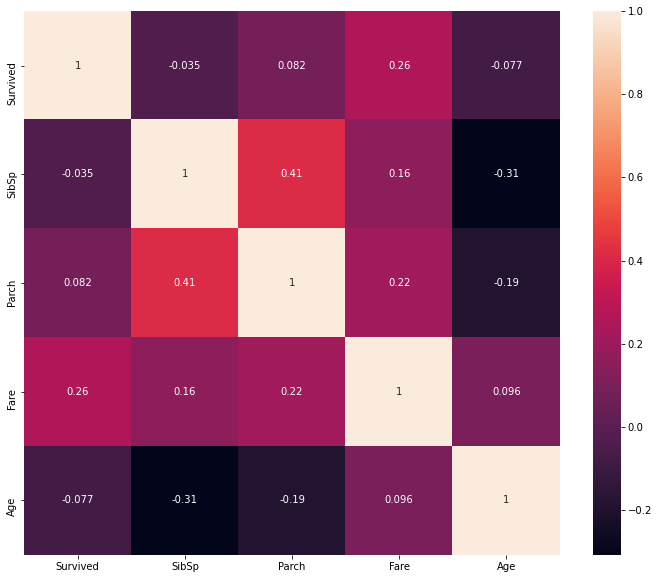

In [4]:
plt.figure(figsize=(12,10))
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot=True)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


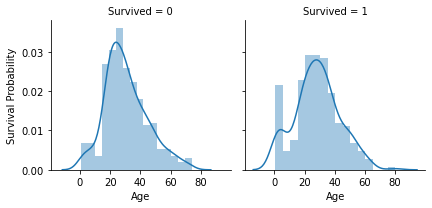

In [5]:
age_visual=sns.FacetGrid(data,col="Survived")
age_visual=age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

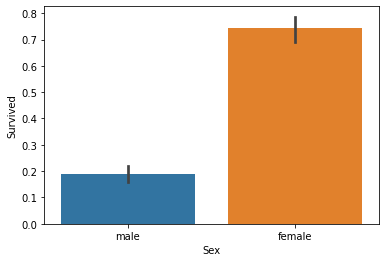

In [6]:
age_plot=sns.barplot(x="Sex",y="Survived",data=data)

In [7]:
data[['Sex','Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


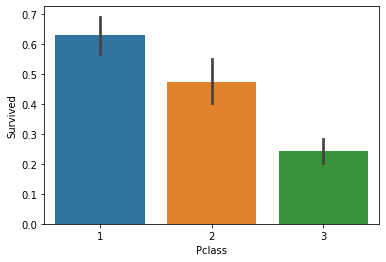

In [8]:
age_plot=sns.barplot(x="Pclass",y="Survived",data=data)

In [9]:
data["Embarked"].isnull().sum()

2

In [10]:
data["Embarked"]=data["Embarked"].fillna("S")

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


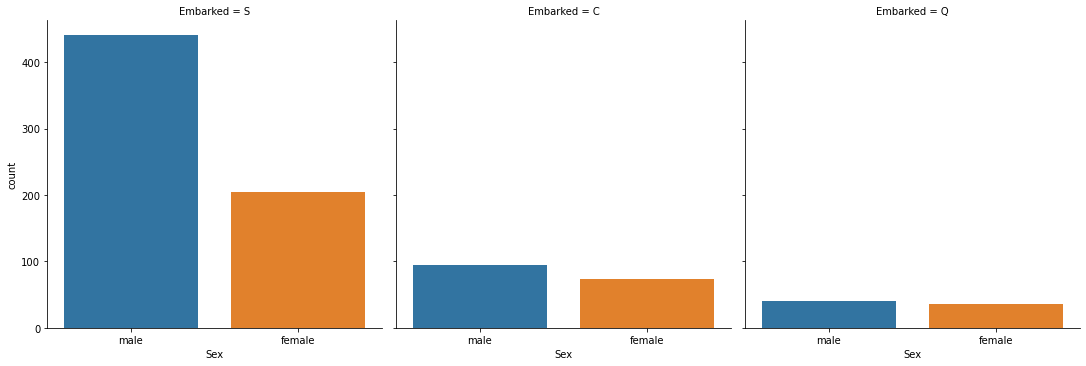

In [13]:
g=sns.factorplot("Sex",col="Embarked",data=data,kind="count")

In [32]:
data=pd.read_csv("C:/Users/kumar/Downloads/titanic_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
mean=data['Age'].mean()
std=data['Age'].std()
is_null=data['Age'].isnull().sum()

In [34]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [35]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)

In [36]:
a=data['Age'].copy()
a[np.isnan(a)]=rand_age

In [37]:
data['Age']=a
data['Age'].isnull().sum()

0

In [38]:
data["Embarked"]=data["Embarked"].fillna("S")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
col_to_drop=['PassengerId','Cabin','Ticket','Name']
data.drop(col_to_drop,axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
genders={"male":0,"female":1}
data['Sex']=data["Sex"].map(genders)
ports={"S":0,"C":1,"Q":2}
data['Embarked']=data['Embarked'].map(ports)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [41]:
x=data.drop(data.columns[[0]],axis=1)

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [43]:
y=data['Survived']

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)

In [47]:
rf=RandomForestClassifier(n_estimators=1000)
lr=LogisticRegression()
knn=KNeighborsClassifier(5)
tree=DecisionTreeClassifier()
svc=SVC()

In [51]:
rf.fit(xtrain,ytrain)
lr.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)

SVC()

In [52]:
rf_ypred=rf.predict(xtest)
lr_ypred=lr.predict(xtest)
knn_ypred=knn.predict(xtest)
tree_ypred=tree.predict(xtest)
svc_ypred=svc.predict(xtest)


In [56]:
from sklearn.metrics import accuracy_score
rfs=accuracy_score(ytest,rf_ypred)
lrs=accuracy_score(ytest,lr_ypred)
knns=accuracy_score(ytest,knn_ypred)
trees=accuracy_score(ytest,tree_ypred)
svcs=accuracy_score(ytest,svc_ypred)

In [57]:
print(rfs)
print(lrs)
print(knns)
print(trees)
print(svcs)


0.7910447761194029
0.8134328358208955
0.8059701492537313
0.746268656716418
0.8134328358208955
